In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import rasterio
import os
from netCDF4 import Dataset
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df1 = pd.read_csv('./Soil_Moisture/sparta.daily.csv', skiprows=lambda x: x in range(8))
df1 = df1[:-45]

In [ ]:
atmpmax = [np.array(df1['atmp_10cm_max']).astype('float'), np.array(df1['atmp_max']).astype('float'), np.array(df1['atmp_10m_max']).astype('float'), np.array(df1['atmp_20m_max']).astype('float')]
atmpmin = [np.array(df1['atmp_10cm_min']).astype('float'), np.array(df1['atmp_min']).astype('float'), np.array(df1['atmp_10m_min']).astype('float'), np.array(df1['atmp_20m_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(atmpmax[0], 'b', lw=1)
ax1.plot(atmpmax[1], 'r', lw=1)
ax1.plot(atmpmax[2], 'y', lw=1)
ax1.plot(atmpmax[3], 'g', lw=1)
ax1.set_ylim(-30, 40)
ax1.set_ylabel('atmp max', fontsize=15)
ax1.legend(['10 cm', '1.5 m', '10 m', '20 m'], fontsize='large')

ax2.plot(atmpmin[0], 'b', lw=1)
ax2.plot(atmpmin[1], 'r', lw=1)
ax2.plot(atmpmin[2], 'y', lw=1)
ax2.plot(atmpmin[3], 'g', lw=1)
ax2.set_ylim(-30, 40)
ax2.set_ylabel('atmp min', fontsize=15)
ax2.set_xticks(np.arange(0, 1287, 143))
ax2.set_xticklabels([df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)

plt.suptitle('Daily Air temperature in Sparta', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/atmp_sparta.png')

In [ ]:
soilmax = [np.array(df1['soil0_max']).astype('float'), np.array(df1['soil1_max']).astype('float'), np.array(df1['soil_20cm_max']).astype('float'), np.array(df1['soil_50cm_max']).astype('float'), np.array(df1['soil_100cm_max']).astype('float')]
soilmin = [np.array(df1['soil0_min']).astype('float'), np.array(df1['soil1_min']).astype('float'), np.array(df1['soil_20cm_min']).astype('float'), np.array(df1['soil_50cm_min']).astype('float'), np.array(df1['soil_100cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(soilmax[0], 'b', lw=1)
ax1.plot(soilmax[1], 'r', lw=1)
ax1.plot(soilmax[2], 'y', lw=1)
ax1.plot(soilmax[3], 'g', lw=1)
ax1.plot(soilmax[4], 'c', lw=1)
ax1.set_ylim(-10, 30)
ax1.set_ylabel('soil max', fontsize=15)
ax1.legend(['5 cm', '10 cm', '20 cm', '50 cm', '100 cm'], fontsize='large')

ax2.plot(soilmin[0], 'b', lw=1)
ax2.plot(soilmin[1], 'r', lw=1)
ax2.plot(soilmin[2], 'y', lw=1)
ax2.plot(soilmin[3], 'g', lw=1)
ax2.plot(soilmin[4], 'c', lw=1)
ax2.set_ylim(-10, 30)
ax2.set_ylabel('soil min', fontsize=15)
ax2.set_xticks(np.arange(0, 1287, 143))
ax2.set_xticklabels([df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)

plt.suptitle('Daily Soil temperature in Sparta', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soiltemp_sparta.png')

In [ ]:
mstrmax = [np.array(df1['mstr0_max']).astype('float'), np.array(df1['mstr1_max']).astype('float'), np.array(df1['mstr_90cm_max']).astype('float'), np.array(df1['mstr_120cm_max']).astype('float')]
mstrmin = [np.array(df1['mstr0_min']).astype('float'), np.array(df1['mstr1_min']).astype('float'), np.array(df1['mstr_90cm_min']).astype('float'), np.array(df1['mstr_120cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(mstrmax[0], 'b', lw=1)
ax1.plot(mstrmax[1], 'r', lw=1)
ax1.plot(mstrmax[2], 'y', lw=1)
ax1.plot(mstrmax[3], 'g', lw=1)
ax1.set_ylim(0, .7)
ax1.set_ylabel('mstr max', fontsize=15)

ax2.plot(mstrmin[0], 'b', lw=1)
ax2.plot(mstrmin[1], 'r', lw=1)
ax2.plot(mstrmin[2], 'y', lw=1)
ax2.plot(mstrmin[3], 'g', lw=1)
ax2.set_ylim(0, .7)
ax2.set_ylabel('mstr min', fontsize=15)
ax2.set_xticks(np.arange(0, 1287, 143))
ax2.set_xticklabels([df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)
ax2.legend(['0-30 cm', '30-60 cm', '60-90 cm', '90-120 cm'], fontsize='large')

plt.suptitle('Daily Soil Moisture  in Sparta', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soilMoisture_sparta.png')

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df1.nrad_max, 'b', lw=1)
plt.plot(df1.nrad_min, 'r', lw=1)
plt.plot(df1.sden_max, 'g', lw=1)
plt.plot(df1.sflux_max, 'y', lw=1)
plt.plot(df1.sflux_min, 'c', lw=1)
# plt.plot(df1.srad / 3.6, 'pink', lw=1)
plt.xticks(ticks=np.arange(0, 1287, 143), labels=[df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)
plt.legend(['Max Net Radiation $(W/m^2)$', 'Min Net Radiation', 'Max Solar Flux', 'Max Soil Heat Flux', 'Min Soil Heat Flux'])
plt.title('Flux and Radiation in Sparta', fontsize=15, fontweight='bold')

In [ ]:
df2 = pd.read_csv('./Soil_Moisture/williamsburg.daily.csv', skiprows=lambda x: x in range(8))
df2 = df2[:-45]

In [ ]:
atmpmax = [np.array(df2['atmp_10cm_max']).astype('float'), np.array(df2['atmp_max']).astype('float'), np.array(df2['atmp_10m_max']).astype('float'), np.array(df2['atmp_20m_max']).astype('float')]
atmpmin = [np.array(df2['atmp_10cm_min']).astype('float'), np.array(df2['atmp_min']).astype('float'), np.array(df2['atmp_10m_min']).astype('float'), np.array(df2['atmp_20m_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(atmpmax[0], 'b', lw=1)
ax1.plot(atmpmax[1], 'r', lw=1)
ax1.plot(atmpmax[2], 'y', lw=1)
ax1.plot(atmpmax[3], 'g', lw=1)
ax1.set_ylim(-30, 40)
ax1.set_ylabel('atmp max', fontsize=15)
ax1.legend(['10 cm', '1.5 m', '10 m', '20 m'], fontsize='large')

ax2.plot(atmpmin[0], 'b', lw=1)
ax2.plot(atmpmin[1], 'r', lw=1)
ax2.plot(atmpmin[2], 'y', lw=1)
ax2.plot(atmpmin[3], 'g', lw=1)
ax2.set_ylim(-30, 40)
ax2.set_ylabel('atmp min', fontsize=15)
ax2.set_xticks(np.arange(0, 1130, 141))
ax2.set_xticklabels([df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)

plt.suptitle('Daily Air temperature in Williamsburg', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/atmp_Williamsburg.png')

In [ ]:
soilmax = [np.array(df2['soil0_max']).astype('float'), np.array(df2['soil1_max']).astype('float'), np.array(df2['soil_20cm_max']).astype('float'), np.array(df2['soil_50cm_max']).astype('float'), np.array(df2['soil_100cm_max']).astype('float')]
soilmin = [np.array(df2['soil0_min']).astype('float'), np.array(df2['soil1_min']).astype('float'), np.array(df2['soil_20cm_min']).astype('float'), np.array(df2['soil_50cm_min']).astype('float'), np.array(df2['soil_100cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(soilmax[0], 'b', lw=1)
ax1.plot(soilmax[1], 'r', lw=1)
ax1.plot(soilmax[2], 'y', lw=1)
ax1.plot(soilmax[3], 'g', lw=1)
ax1.plot(soilmax[4], 'c', lw=1)
ax1.set_ylim(-10, 30)
ax1.set_ylabel('soil max', fontsize=15)
ax1.legend(['5 cm', '10 cm', '20 cm', '50 cm', '100 cm'], fontsize='large')

ax2.plot(soilmin[0], 'b', lw=1)
ax2.plot(soilmin[1], 'r', lw=1)
ax2.plot(soilmin[2], 'y', lw=1)
ax2.plot(soilmin[3], 'g', lw=1)
ax2.plot(soilmin[4], 'c', lw=1)
ax2.set_ylim(-10, 30)
ax2.set_ylabel('soil min', fontsize=15)
ax2.set_xticks(np.arange(0, 1130, 141))
ax2.set_xticklabels([df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)

plt.suptitle('Daily Soil temperature in Williamsburg', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soiltemp_Williamsburg.png')

In [ ]:
mstrmax = [np.array(df2['mstr0_max']).astype('float'), np.array(df2['mstr1_max']).astype('float'), np.array(df2['mstr_90cm_max']).astype('float'), np.array(df2['mstr_120cm_max']).astype('float')]
mstrmin = [np.array(df2['mstr0_min']).astype('float'), np.array(df2['mstr1_min']).astype('float'), np.array(df2['mstr_90cm_min']).astype('float'), np.array(df2['mstr_120cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(mstrmax[0], 'b', lw=1)
ax1.plot(mstrmax[1], 'r', lw=1)
ax1.plot(mstrmax[2], 'y', lw=1)
ax1.plot(mstrmax[3], 'g', lw=1)
ax1.set_ylim(0, .7)
ax1.set_ylabel('mstr max', fontsize=15)

ax2.plot(mstrmin[0], 'b', lw=1)
ax2.plot(mstrmin[1], 'r', lw=1)
ax2.plot(mstrmin[2], 'y', lw=1)
ax2.plot(mstrmin[3], 'g', lw=1)
ax2.set_ylim(0, .7)
ax2.set_ylabel('mstr min', fontsize=15)
ax2.set_xticks(np.arange(0, 1130, 141))
ax2.set_xticklabels([df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)
ax2.legend(['0-30 cm', '30-60 cm', '60-90 cm', '90-120 cm'], fontsize='large')

plt.suptitle('Daily Soil Moisture  in Williamsburg', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soilMoisture_Williamsburg.png')

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df2.nrad_max, 'b', lw=1)
plt.plot(df2.nrad_min, 'r', lw=1)
plt.plot(df2.sden_max, 'g', lw=1)
plt.plot(df2.sflux_max, 'y', lw=1)
plt.plot(df2.sflux_min, 'c', lw=1)
# plt.plot(df2.srad / 3.6, 'pink', lw=1)
plt.xticks(ticks=np.arange(0, 1130, 141), labels=[df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)
plt.legend(['Max Net Radiation $(W/m^2)$', 'Min Net Radiation', 'Max Solar Flux', 'Max Soil Heat Flux', 'Min Soil Heat Flux'])
plt.title('Flux and Radiation in Williamsburg', fontsize=15, fontweight='bold')

<font size=4 color=blue>validate wrfout

In [9]:
DIR = './prism/SoilM_WRF/'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
for i in range(fno):
    z = ZipFile(DIR+fna[i])
    z.extractall(DIR+fna[i][:-4])

tmin = []
folder = './prism/SoilM_WRF/'
subfolders = [ f.path for f in os.scandir(folder) if f.is_dir() ]
for i in range(len(subfolders)):
    bil = rasterio.open(subfolders[i]+'/'+subfolders[i][18:]+'.bil')
    a = bil.read()[0, :357, 479:1201]
    tmin.append(a)
tmin = np.array(tmin)
np.savez_compressed('./prism/202005_tmin', tmin=tmin)

In [31]:
tmin = np.load('./prism/202005_tmin.npz')['tmin']
tmin = np.where(tmin<-100, np.nan, tmin)
lat = np.array([49.9166666666664 - i * 0.0416666666667 for i in range(357)])
lon = np.array([-105.0416666666507 + i * 0.0416666666667 for i in range(722)])
Lon, Lat = np.meshgrid(lon, lat)
date = ['May 12th', 'May 13th', 'May 8th', 'May 9th']
name = ['May12th', 'May13th', 'May8th', 'May9th']
extent = [-96.2, -79.35, 40.7, 49.52]

for ii in range(4):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
    ax.set_extent(extent)
    states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
    ax.add_feature(states, linewidth=.3, edgecolor="black")
    ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
    ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
    ax.add_feature(cartopy.feature.STATES.with_scale('10m'))

    levels = MaxNLocator(nbins=100).tick_values(-10, 10)
    cmap = plt.get_cmap('jet')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    pc = plt.pcolormesh(Lon, Lat, tmin[ii, :, :], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    plt.title(f'PRISM Daily minimum 2m Temperature (\u00b0C) on {date[ii]}', fontsize=15, fontweight='bold')

    fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
    cb_ax = fig.add_axes([0.905, 0.07, 0.02, 0.815])
    cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(-10, 12, 2), extend='both')
    plt.savefig(f'./Soil_Moisture/plot/tmin_{name[ii]}.png')
    plt.close()

<font size=4 color=blue>initial soil moisture

In [2]:
wrfout = Dataset('./wrfout/orig/freeze1/wrfout_d01_2020-05-12_00:00:00')  # 'ISLTYP' 'SMOIS' 'IVGTYP'
lat = wrfout['XLAT'][0,:,:]
lon = wrfout['XLONG'][0,:,:]

In [23]:
veg =  pd.read_table('./var/IVGTYP.txt', skiprows=2, delimiter=',')
veg = veg[:28]

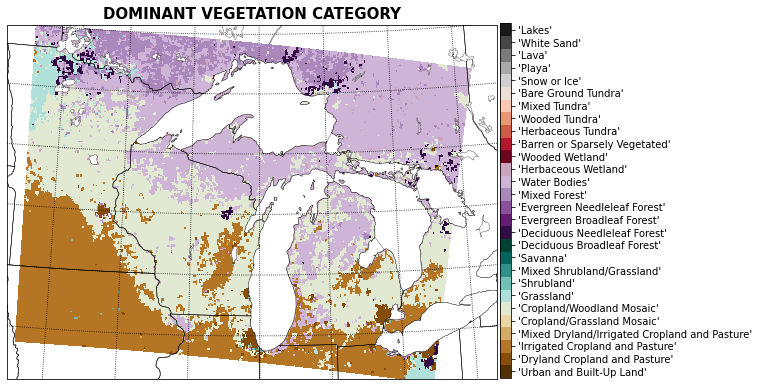

In [18]:
extent = [-96.2, -79.35, 40.7, 49.52]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)
ax.gridlines(color="black", linestyle="dotted", lw=.1)

cmap_name = '28color'
colors= ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30',
        '#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#67001f','#b2182b','#d6604d','#f4a582','#fddbc7',
        '#e0e0e0','#bababa','#878787','#4d4d4d','#1a1a1a']
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=28)
levels = MaxNLocator(nbins=28).tick_values(0, 28)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(lon, lat, wrfout['IVGTYP'][0,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title('DOMINANT VEGETATION CATEGORY', fontsize=15, fontweight='bold')

fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(.5, 29))
cbar.ax.set_yticklabels([veg['type'][i].strip() for i in range(28)])

plt.savefig('./Soil_Moisture/plot/vegetation_category.png')

In [26]:
soityp =  pd.read_table('./var/ISLTYP.txt', skiprows=2, delimiter=',')
soityp = soityp[:19]

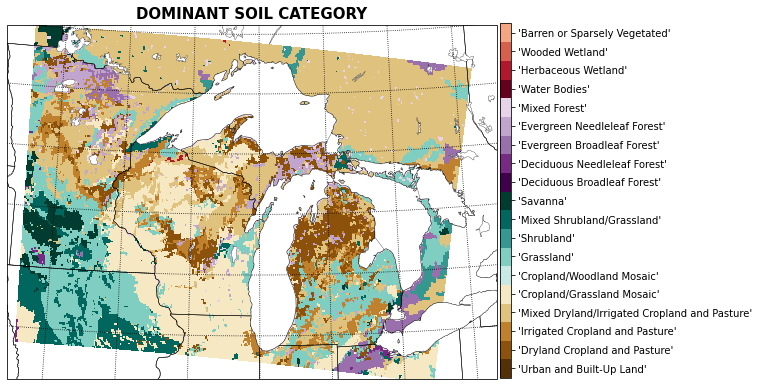

In [30]:
extent = [-96.2, -79.35, 40.7, 49.52]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)
ax.gridlines(color="black", linestyle="dotted", lw=.1)

cmap_name = '19color'
colors= ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30',
        '#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#67001f','#b2182b','#d6604d','#f4a582']
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=19)
levels = MaxNLocator(nbins=19).tick_values(0, 19)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(lon, lat, wrfout['ISLTYP'][0,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title('DOMINANT SOIL CATEGORY', fontsize=15, fontweight='bold')

fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(.5, 20))
cbar.ax.set_yticklabels([veg['type'][i].strip() for i in range(19)])

plt.savefig('./Soil_Moisture/plot/soil_category.png')

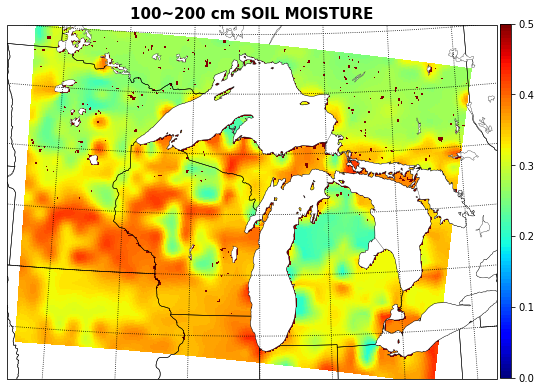

In [9]:
extent = [-96.2, -79.35, 40.7, 49.52]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)
ax.gridlines(color="black", linestyle="dotted", lw=.1)

cmap = plt.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(0, .5)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(lon, lat, wrfout['SMOIS'][0,3,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title('100~200 cm SOIL MOISTURE', fontsize=15, fontweight='bold')

fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(0, .6, .1))

plt.savefig('./Soil_Moisture/plot/sm_100200cm.png')